In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('fivethirtyeight')

In /home/ramon/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ramon/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ramon/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ramon/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ramon/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
import pickle

In [63]:
with open('dataframe_imp.df', 'rb') as f:
    df = pickle.load(f)
df.head()

Fecha  Bitcoin          Oro   Petroleo      Plata      Platino  \
0  2009-01-01      NaN          NaN        NaN        NaN          NaN   
1  2009-01-02      NaN  1056.150010  56.064899  13.454604  1149.591508   
2  2009-01-03      NaN  1052.203488  57.052541  13.450557  1154.003517   
3  2009-01-04      NaN  1048.256966  58.040184  13.446509  1158.415527   
4  2009-01-05      NaN  1044.310444  59.027826  13.442461  1162.827536   

       Euro  HongKongDolar     Pound      Yuan  ...  ComisionMediana  \
0       NaN       9.410937       NaN       NaN  ...              NaN   
1  1.682068       9.411180  1.760756  8.281625  ...              NaN   
2  1.672475       9.411463  1.764804  8.285672  ...              NaN   
3  1.662882       9.411747  1.768851  8.289720  ...              NaN   
4  1.653289       9.412030  1.772899  8.293768  ...              NaN   

   MarketCap  PromedioValorTransaccion  MedianaValorTransaccion  \
0        NaN                       NaN                      NaN   
1        NaN                       NaN                      NaN   
2        NaN                       NaN                      NaN   
3        NaN                       NaN                      NaN   
4        NaN                       NaN                      NaN   

   HashtagBitcoin  GoogleTrendsBitcoin  DireccionesActivas  HackerNewsPosts  \
0             NaN                  NaN                 NaN              0.0   
1             NaN                  NaN                 NaN              0.0   
2             NaN                  NaN                 NaN              0.0   
3             NaN                  NaN                 NaN              0.0   
4             NaN                  NaN                 NaN              0.0   

   NuevasCryptoMonedas      CPI  
0                  0.0  0.82351  
1                  0.0  0.82351  
2                  0.0  0.82351  
3                  0.0  0.82351  
4                  0.0  0.82351  

[5 rows x 33 columns]

In [64]:
df = df.set_index(pd.DatetimeIndex(df['Fecha'].values))

In [65]:
df.head()

Fecha  Bitcoin          Oro   Petroleo      Plata  \
2009-01-01  2009-01-01      NaN          NaN        NaN        NaN   
2009-01-02  2009-01-02      NaN  1056.150010  56.064899  13.454604   
2009-01-03  2009-01-03      NaN  1052.203488  57.052541  13.450557   
2009-01-04  2009-01-04      NaN  1048.256966  58.040184  13.446509   
2009-01-05  2009-01-05      NaN  1044.310444  59.027826  13.442461   

                Platino      Euro  HongKongDolar     Pound      Yuan  ...  \
2009-01-01          NaN       NaN       9.410937       NaN       NaN  ...   
2009-01-02  1149.591508  1.682068       9.411180  1.760756  8.281625  ...   
2009-01-03  1154.003517  1.672475       9.411463  1.764804  8.285672  ...   
2009-01-04  1158.415527  1.662882       9.411747  1.768851  8.289720  ...   
2009-01-05  1162.827536  1.653289       9.412030  1.772899  8.293768  ...   

            ComisionMediana  MarketCap  PromedioValorTransaccion  \
2009-01-01              NaN        NaN                       NaN   
2009-01-02              NaN        NaN                       NaN   
2009-01-03              NaN        NaN                       NaN   
2009-01-04              NaN        NaN                       NaN   
2009-01-05              NaN        NaN                       NaN   

            MedianaValorTransaccion  HashtagBitcoin  GoogleTrendsBitcoin  \
2009-01-01                      NaN             NaN                  NaN   
2009-01-02                      NaN             NaN                  NaN   
2009-01-03                      NaN             NaN                  NaN   
2009-01-04                      NaN             NaN                  NaN   
2009-01-05                      NaN             NaN                  NaN   

            DireccionesActivas  HackerNewsPosts  NuevasCryptoMonedas      CPI  
2009-01-01                 NaN              0.0                  0.0  0.82351  
2009-01-02                 NaN              0.0                  0.0  0.82351  
2009-01-03                 NaN              0.0                  0.0  0.82351  
2009-01-04                 NaN              0.0                  0.0  0.82351  
2009-01-05                 NaN              0.0                  0.0  0.82351  

[5 rows x 33 columns]

In [66]:
import datetime
#df = df.loc[len(df)//2,:]

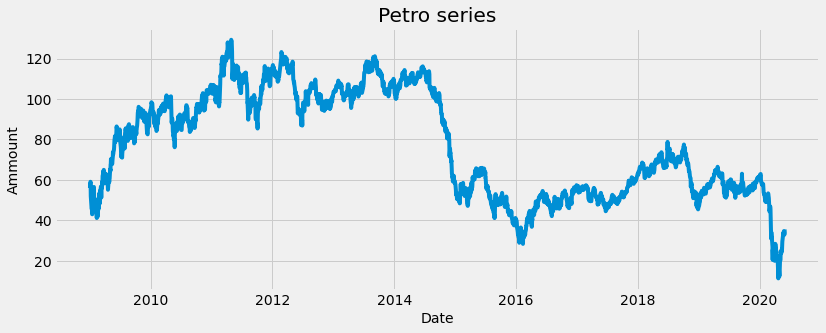

In [67]:
plt.figure(figsize=(12.2, 4.5))
plt.title('Petro series')
plt.plot(df.Petroleo)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Ammount', fontsize=14)
plt.show()

### Moving Averages

In [166]:
EMA_mes = df.Petroleo.ewm(span=240*2, adjust=False).mean()
EMA_cuatri = df.Petroleo.ewm(span=840*2, adjust=False).mean()
EMA_anio = df.Petroleo.ewm(span=2000*2, adjust=False).mean()

In [167]:
df['corto'] = EMA_mes
df['med'] = EMA_cuatri
df['largo'] = EMA_anio

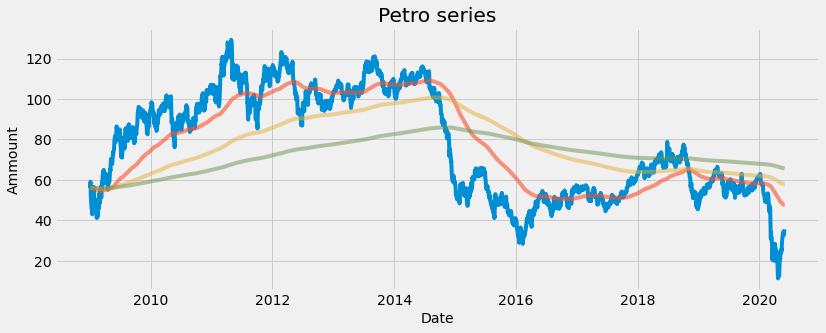

In [168]:
plt.figure(figsize=(12.2, 4.5))
plt.title('Petro series')
plt.plot(df.Petroleo)
plt.plot(EMA_mes, alpha=.6)
plt.plot(EMA_cuatri, alpha=.5)
plt.plot(EMA_anio, alpha=.5)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Ammount', fontsize=14)
plt.show()

In [169]:
def buy_sell_fx(data, var):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0, len(data)):
        if len(buy_list)>len(data):print('>>>',i)
        if data['med'][i] < data['largo'][i] and data['corto'][i] < data['med'][i] and flag_long == False: 
  #          print(1)
            buy_list.append(data[var][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['corto'][i] > data['med'][i]:
   #         print(2)
            sell_list.append(data[var][i])
            buy_list.append(np.nan)
            flag_short = False
        elif data['med'][i] > data['largo'][i] and data['corto'][i] > data['med'][i] and flag_long == False: 
    #        print(3)
            buy_list.append(data[var][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['corto'][i] < data['med'][i]:
     #       print(4)
            sell_list.append(data[var][i])
            buy_list.append(np.nan)
            flag_short = False
        else:
      #      print(5)
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)

In [170]:
df['buy'] = buy_sell_fx(df, 'Petroleo')[0]
df['sell'] = buy_sell_fx(df, 'Petroleo')[1]

In [171]:
df.head()

Fecha  Bitcoin          Oro   Petroleo      Plata  \
2009-01-01  2009-01-01      NaN          NaN        NaN        NaN   
2009-01-02  2009-01-02      NaN  1056.150010  56.064899  13.454604   
2009-01-03  2009-01-03      NaN  1052.203488  57.052541  13.450557   
2009-01-04  2009-01-04      NaN  1048.256966  58.040184  13.446509   
2009-01-05  2009-01-05      NaN  1044.310444  59.027826  13.442461   

                Platino      Euro  HongKongDolar     Pound      Yuan  ...  \
2009-01-01          NaN       NaN       9.410937       NaN       NaN  ...   
2009-01-02  1149.591508  1.682068       9.411180  1.760756  8.281625  ...   
2009-01-03  1154.003517  1.672475       9.411463  1.764804  8.285672  ...   
2009-01-04  1158.415527  1.662882       9.411747  1.768851  8.289720  ...   
2009-01-05  1162.827536  1.653289       9.412030  1.772899  8.293768  ...   

            GoogleTrendsBitcoin  DireccionesActivas  HackerNewsPosts  \
2009-01-01                  NaN                 NaN              0.0   
2009-01-02                  NaN                 NaN              0.0   
2009-01-03                  NaN                 NaN              0.0   
2009-01-04                  NaN                 NaN              0.0   
2009-01-05                  NaN                 NaN              0.0   

            NuevasCryptoMonedas      CPI      corto        med      largo  \
2009-01-01                  0.0  0.82351        NaN        NaN        NaN   
2009-01-02                  0.0  0.82351  56.064899  56.064899  56.064899   
2009-01-03                  0.0  0.82351  56.069006  56.066074  56.065393   
2009-01-04                  0.0  0.82351  56.077202  56.068423  56.066380   
2009-01-05                  0.0  0.82351  56.089471  56.071944  56.067860   

                  buy       sell  
2009-01-01        NaN        NaN  
2009-01-02        NaN        NaN  
2009-01-03  57.052541        NaN  
2009-01-04        NaN  58.040184  
2009-01-05  59.027826        NaN  

[5 rows x 38 columns]

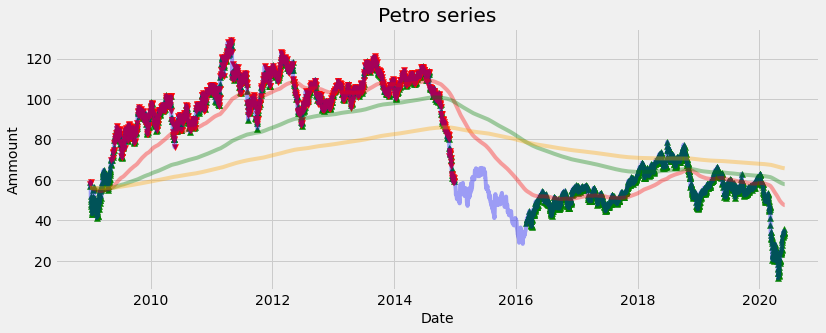

In [173]:
plt.figure(figsize=(12.2, 4.5))
plt.title('Petro series')
plt.plot(df.Petroleo, color='blue', alpha=0.35)
plt.plot(EMA_mes, color='red', alpha=.35)
plt.plot(EMA_cuatri, color='green', alpha=.35)
plt.plot(EMA_anio, color='orange', alpha=.35)
plt.scatter(df.index, df['buy'], color='green', marker='^', alpha=1)
plt.scatter(df.index, df['sell'], color='red', marker='v', alpha=1)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Ammount', fontsize=14)
plt.show()